In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from report_config import ReportConfig

In [2]:
reviews_df = pd.read_csv("./glassdoor_reviews_predicted.csv")

In [3]:
reviews_df["sentiment"] = reviews_df["sentiment"].apply(lambda x: 2 if x == -1 else x)

In [4]:
reviews_df["predicted_sentiment_label"] = reviews_df["predicted_sentiment"].map(
    ReportConfig.SENTIMENT_DICT
)

In [5]:
mean_reviews_count = len(reviews_df) / len(reviews_df["company"].unique())
mean_reviews_count

115.0909090909091

In [6]:
review_counts = reviews_df.groupby("company")["review_id"].count()
sorted_counts = review_counts.sort_values()
median = sorted_counts.median()
median

42.0

In [7]:
sorted_counts

company
Original Soluções Tecnológicas                                 2
Intelecto Sistemas                                             6
Datweb                                                        12
MTI - Empresa Mato-grossense de Tecnologia da Informação      14
Puma Sistemas                                                 16
Ganso Sistemas                                                30
Coplan Consultoria e Planejamento                             32
Tecnomapas                                                    34
Fundação Uniselva                                             36
Liberali                                                      36
MOVERE (Brazil)                                               40
Totem Treinamento e Consultoria em TI                         44
Log, Lab. Inteligência Digital                                50
NBS Informática                                               54
Eco Centauro                                                  74
Agenda Assessoria

# Top 5 positive and negative companies

In [8]:
reviews_df = reviews_df.sort_values(by="predicted_sentiment").reset_index()

In [9]:
reviews_df.head(2)

,index,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated,predicted_sentiment,predicted_sentiment_label
0,1265,64925288,Cigam Software Corporativo,Estagiário,Funcionário(a) atual,não encontrei nenhum até hoje,2022-05-31,5.0,0,1,0,Neutro
1,1841,75733214,Grupo Bom Futuro,Assistente de pagadoria,Funcionário(a) atual,Não tem contras nada a dizer,2023-04-22,5.0,0,1,0,Neutro


Create a column to order predicted_sentiment as `positive`, `negative` and `neutral` instead of `neutral`, `positive` and `negative`

In [10]:
conditions = [
    (reviews_df["predicted_sentiment"] == 0),
    (reviews_df["predicted_sentiment"] == 1),
    (reviews_df["predicted_sentiment"] == 2),
]

values = [3, 1, 2]

reviews_df["predicted_sentiment_plot"] = np.select(conditions, values)

In [11]:
reviews_df.head(2)

,index,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated,predicted_sentiment,predicted_sentiment_label,predicted_sentiment_plot
0,1265,64925288,Cigam Software Corporativo,Estagiário,Funcionário(a) atual,não encontrei nenhum até hoje,2022-05-31,5.0,0,1,0,Neutro,3
1,1841,75733214,Grupo Bom Futuro,Assistente de pagadoria,Funcionário(a) atual,Não tem contras nada a dizer,2023-04-22,5.0,0,1,0,Neutro,3


In [12]:
reviews_df[reviews_df["company"].str.startswith("MTI")]["company"].count()

14

In [13]:
sentiment_counts = (
    reviews_df.groupby(["company", "predicted_sentiment_plot"])
    .size()
    .unstack(fill_value=0)
)

sentiment_counts_reset = sentiment_counts.reset_index()
sentiment_counts_reset.columns = ["company", "1positive", "2negative", "3neutral"]

In [14]:
sentiment_counts

predicted_sentiment_plot,1,2,3
company,,,
Abaco Tecnologia de Informação Ltda,50,50,10
Agenda Assessoria,46,40,10
Amaggi,438,349,69
Cigam Software Corporativo,176,139,39
Coplan Consultoria e Planejamento,15,14,3
DSS Tecnologia,53,52,17
Datweb,7,4,1
Eco Centauro,38,28,8
Fundação Uniselva,17,18,1


In [15]:
# & (
#             sentiment_counts_reset["1positive"]
#             + sentiment_counts_reset["2negative"]
#             + sentiment_counts_reset["3neutral"] >= min_reviews
#         )

In [16]:
def get_bad_rating_companies():
    negative_greater_than_positive = sentiment_counts_reset[
        sentiment_counts_reset["2negative"] > sentiment_counts_reset["1positive"]
    ]

    negative_greater_than_positive = negative_greater_than_positive.sort_values(
        by="2negative", ascending=False
    ).reset_index()

    return list(negative_greater_than_positive["company"].values)

In [17]:
def get_good_rating_companies():
    positive_greater_than_negative = sentiment_counts_reset[
        sentiment_counts_reset["1positive"] > sentiment_counts_reset["2negative"]
    ]

    positive_greater_than_negative = positive_greater_than_negative.sort_values(
        by="1positive", ascending=False
    ).reset_index()

    return list(positive_greater_than_negative["company"].values)

In [18]:
def get_neutral_rating_companies(min_reviews=0):
    positive_equal_to_negative = sentiment_counts_reset[
        sentiment_counts_reset["1positive"] == sentiment_counts_reset["2negative"]
    ]

    return list(positive_equal_to_negative["company"].values)

In [19]:
bad_rating_companies = get_bad_rating_companies()
good_rating_companies = get_good_rating_companies()
neutral_rating_companies = get_neutral_rating_companies()

In [20]:
sentiment_by_company_count_df = (
    reviews_df.groupby(["company", "predicted_sentiment_plot"])
    .size()
    .reset_index(name="count")
)

In [21]:
sentiment_by_company_count_df

,company,predicted_sentiment_plot,count
0,Abaco Tecnologia de Informação Ltda,1,50
1,Abaco Tecnologia de Informação Ltda,2,50
2,Abaco Tecnologia de Informação Ltda,3,10
3,Agenda Assessoria,1,46
4,Agenda Assessoria,2,40
...,...,...,...
60,Tecnomapas,2,14
61,Tecnomapas,3,5
62,Totem Treinamento e Consultoria em TI,1,22
63,Totem Treinamento e Consultoria em TI,2,17


In [22]:
predicted_sentiment_plot_count_df = (
    reviews_df.groupby(["company", "predicted_sentiment_plot"])
    .size()
    .unstack(fill_value=0)
)

In [23]:
predicted_sentiment_plot_count_df

predicted_sentiment_plot,1,2,3
company,,,
Abaco Tecnologia de Informação Ltda,50,50,10
Agenda Assessoria,46,40,10
Amaggi,438,349,69
Cigam Software Corporativo,176,139,39
Coplan Consultoria e Planejamento,15,14,3
DSS Tecnologia,53,52,17
Datweb,7,4,1
Eco Centauro,38,28,8
Fundação Uniselva,17,18,1


In [24]:
predicted_sentiment_plot_count_df = predicted_sentiment_plot_count_df.reset_index()

# company_sentiment_counts_diff = (
#     predicted_sentiment_plot_count_df.groupby(["company", "predicted_sentiment_plot"])
#     .size()
#     .unstack(fill_value=0)
# )

In [25]:
predicted_sentiment_plot_count_df

predicted_sentiment_plot,company,1,2,3
0,Abaco Tecnologia de Informação Ltda,50,50,10
1,Agenda Assessoria,46,40,10
2,Amaggi,438,349,69
3,Cigam Software Corporativo,176,139,39
4,Coplan Consultoria e Planejamento,15,14,3
5,DSS Tecnologia,53,52,17
6,Datweb,7,4,1
7,Eco Centauro,38,28,8
8,Fundação Uniselva,17,18,1
9,Ganso Sistemas,16,12,2


In [26]:
predicted_sentiment_plot_count_df.columns = [
    "company",
    "1positive",
    "2negative",
    "3neutral",
]

In [27]:
predicted_sentiment_plot_count_df

,company,1positive,2negative,3neutral
0,Abaco Tecnologia de Informação Ltda,50,50,10
1,Agenda Assessoria,46,40,10
2,Amaggi,438,349,69
3,Cigam Software Corporativo,176,139,39
4,Coplan Consultoria e Planejamento,15,14,3
5,DSS Tecnologia,53,52,17
6,Datweb,7,4,1
7,Eco Centauro,38,28,8
8,Fundação Uniselva,17,18,1
9,Ganso Sistemas,16,12,2


In [28]:
predicted_sentiment_plot_count_df["sentiment_diff"] = (
    predicted_sentiment_plot_count_df["1positive"]
    - predicted_sentiment_plot_count_df["2negative"]
)

In [29]:
predicted_sentiment_plot_count_df

,company,1positive,2negative,3neutral,sentiment_diff
0,Abaco Tecnologia de Informação Ltda,50,50,10,0
1,Agenda Assessoria,46,40,10,6
2,Amaggi,438,349,69,89
3,Cigam Software Corporativo,176,139,39,37
4,Coplan Consultoria e Planejamento,15,14,3,1
5,DSS Tecnologia,53,52,17,1
6,Datweb,7,4,1,3
7,Eco Centauro,38,28,8,10
8,Fundação Uniselva,17,18,1,-1
9,Ganso Sistemas,16,12,2,4


In [30]:
predicted_sentiment_plot_count_df = predicted_sentiment_plot_count_df.sort_values(
    by="sentiment_diff", ascending=False
).reset_index()

In [31]:
predicted_sentiment_plot_count_df

,index,company,1positive,2negative,3neutral,sentiment_diff
0,2,Amaggi,438,349,69,89
1,10,Grupo Bom Futuro,173,116,35,57
2,3,Cigam Software Corporativo,176,139,39,37
3,7,Eco Centauro,38,28,8,10
4,1,Agenda Assessoria,46,40,10,6
5,21,Totem Treinamento e Consultoria em TI,22,17,5,5
6,9,Ganso Sistemas,16,12,2,4
7,18,Puma Sistemas,9,6,1,3
8,6,Datweb,7,4,1,3
9,13,"Log, Lab. Inteligência Digital",25,23,2,2


In [32]:
company_sentiment_counts = pd.merge(
    left=sentiment_by_company_count_df,
    right=predicted_sentiment_plot_count_df,
    on="company",
    how="left",
)

In [33]:
company_sentiment_counts = company_sentiment_counts.sort_values(
    by="sentiment_diff", ascending=False
).reset_index()

In [34]:
company_sentiment_counts

,level_0,company,predicted_sentiment_plot,count,index,1positive,2negative,3neutral,sentiment_diff
0,8,Amaggi,3,69,2,438,349,69,89
1,6,Amaggi,1,438,2,438,349,69,89
2,7,Amaggi,2,349,2,438,349,69,89
3,30,Grupo Bom Futuro,1,173,10,173,116,35,57
4,31,Grupo Bom Futuro,2,116,10,173,116,35,57
...,...,...,...,...,...,...,...,...,...
60,37,Liberali,2,20,12,15,20,1,-5
61,36,Liberali,1,15,12,15,20,1,-5
62,56,Redeflex,1,87,19,87,96,7,-9
63,57,Redeflex,2,96,19,87,96,7,-9


In [35]:
top_company_sentiment_counts = company_sentiment_counts[
    (
        company_sentiment_counts["company"].isin(good_rating_companies[:5])
        | company_sentiment_counts["company"].isin(bad_rating_companies[:5])
    )
]

In [36]:
top_company_sentiment_counts

,level_0,company,predicted_sentiment_plot,count,index,1positive,2negative,3neutral,sentiment_diff
0,8,Amaggi,3,69,2,438,349,69,89
1,6,Amaggi,1,438,2,438,349,69,89
2,7,Amaggi,2,349,2,438,349,69,89
3,30,Grupo Bom Futuro,1,173,10,173,116,35,57
4,31,Grupo Bom Futuro,2,116,10,173,116,35,57
5,32,Grupo Bom Futuro,3,35,10,173,116,35,57
6,9,Cigam Software Corporativo,1,176,3,176,139,39,37
7,10,Cigam Software Corporativo,2,139,3,176,139,39,37
8,11,Cigam Software Corporativo,3,39,3,176,139,39,37
12,5,Agenda Assessoria,3,10,1,46,40,10,6


## Barplot

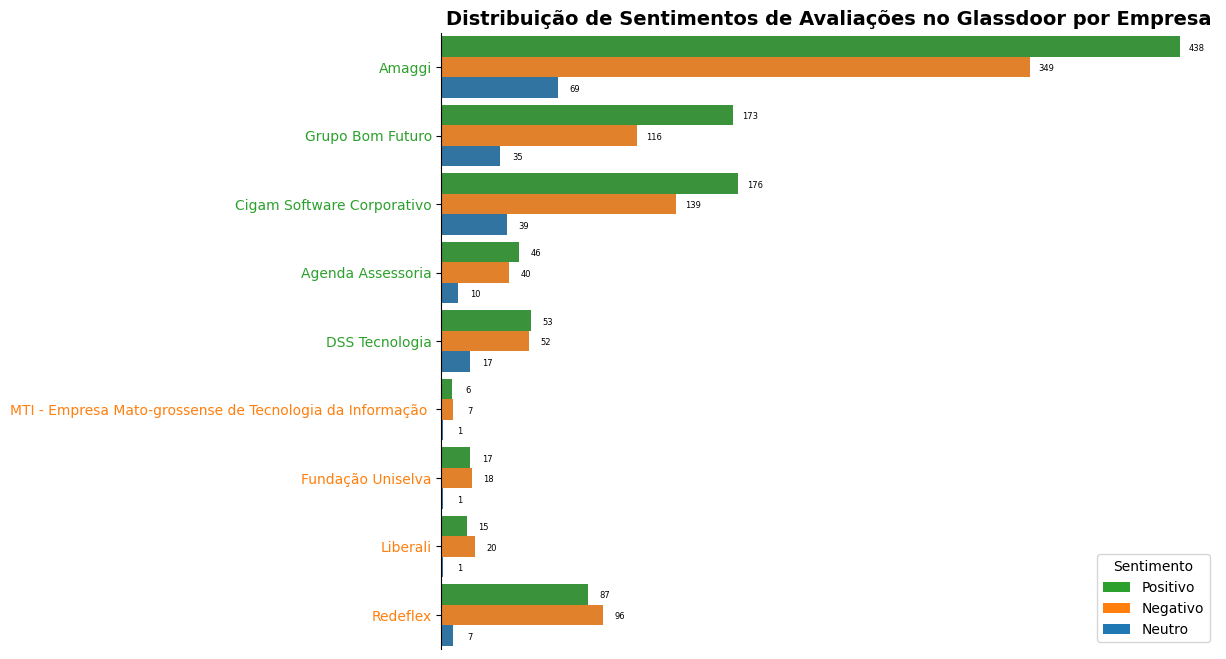

In [37]:
# Step 2: Create the bar plot using sns.barplot
fig, ax = plt.subplots(1, figsize=(10, 8))  # Create a subplot if not already done

company_barplot = sns.barplot(
    data=top_company_sentiment_counts,
    x="count",  # y-axis for counts
    y="company",  # x-axis for companies
    hue="predicted_sentiment_plot",  # Different colors for each sentiment
    palette=[
        ReportConfig.POSITIVE_SENTIMENT_COLOR,
        ReportConfig.NEGATIVE_SENTIMENT_COLOR,
        ReportConfig.NEUTRAL_SENTIMENT_COLOR,
    ],
    ax=ax,
    width=0.9,
    orient="h",
)

# Highlight Companies
for i, label in enumerate(ax.get_yticklabels()):
    company_name = label.get_text()
    if company_name in bad_rating_companies:
        label.set_color(ReportConfig.NEGATIVE_SENTIMENT_COLOR)

for i, label in enumerate(ax.get_yticklabels()):
    company_name = label.get_text()
    if company_name in good_rating_companies:
        label.set_color(ReportConfig.POSITIVE_SENTIMENT_COLOR)

for i, label in enumerate(ax.get_yticklabels()):
    company_name = label.get_text()
    if company_name in neutral_rating_companies:
        label.set_color(ReportConfig.NEUTRAL_SENTIMENT_COLOR)

# Plot Annotates
for p in ax.patches:
    ax.annotate(
        text=f"{p.get_width():.0f}",
        xy=(p.get_width() + 10, (p.get_y() + p.get_height() / 2) + 0.02),
        ha="center",
        va="center",
        fontsize=6,
        color="black",
        xytext=(0, 0),
        textcoords="offset points",
    )

# ## Top Companies Annotates
# y_min, y_max = ax.get_ylim()
# y_position = (y_min + y_max) / 2

# x_annonate = 200
# font_size_annotate = 12
# # Top Positive Companies Annotates
# ax.annotate(
#     "Top 3 reviews positivos:",
#     xy=(x_annonate, y_position - 3),
#     fontsize=font_size_annotate,
#     color=ReportConfig.POSITIVE_SENTIMENT_COLOR,
# )

# for index, company in enumerate(good_rating_companies[:3]):
#     ax.annotate(
#         f"{index + 1}º: {company}",
#         xy=(x_annonate, y_position - 3 + 0.6 + index * 0.6),
#         fontsize=font_size_annotate,
#         color=ReportConfig.POSITIVE_SENTIMENT_COLOR,
#     )

# # Top Negative Companies Annotates
# ax.annotate(
#     "Top 3 reviews negativos:",
#     xy=(x_annonate, y_position),
#     fontsize=font_size_annotate,
#     color=ReportConfig.NEGATIVE_SENTIMENT_COLOR,
# )

# for index, company in enumerate(bad_rating_companies[:3]):
#     ax.annotate(
#         f"{index + 1}º: {company}",
#         xy=(x_annonate, y_position + 0.6 + index * 0.6),
#         fontsize=font_size_annotate,
#         color=ReportConfig.NEGATIVE_SENTIMENT_COLOR,
#     )

plt.xlabel("")
plt.xticks([])

plt.ylabel("")

plt.title(
    "Distribuição de Sentimentos de Avaliações no Glassdoor por Empresa",
    fontdict={
        "weight": "bold",
        "size": ReportConfig.CHART_TITLE_FONT_SIZE,
    },
    loc="center",
)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

positive_patch = plt.Rectangle((0, 0), 1, 1, fc=ReportConfig.POSITIVE_SENTIMENT_COLOR)
negative_patch = plt.Rectangle((0, 0), 1, 1, fc=ReportConfig.NEGATIVE_SENTIMENT_COLOR)
neutral_patch = plt.Rectangle((0, 0), 1, 1, fc=ReportConfig.NEUTRAL_SENTIMENT_COLOR)

# Set the legend with custom labels and handles
plt.legend(
    handles=[positive_patch, negative_patch, neutral_patch],
    labels=["Positivo", "Negativo", "Neutro"],
    title="Sentimento",
)

plt.show()